# GRIP Task 2 - Prediction using Decision tree algorithm
## Given by "The Sparks Foundation"
### Author - Uday Kamal

### Aim - To predict the iris species corresponding to its existing features (i.e Sepal length, Sepal width, Petal length & Petal width)
#### Accuracy of prediction - 90%

In [137]:
#for data manipulations
import pandas as pd
import numpy as np
#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#for model operations
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as le
from sklearn import tree

### The main dataset

In [138]:
df=pd.read_csv('Iris - Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### There are 3 types of species given in the dataset which are namely given in the output.

In [139]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Checking for any null values in the dataset and visualizing them.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


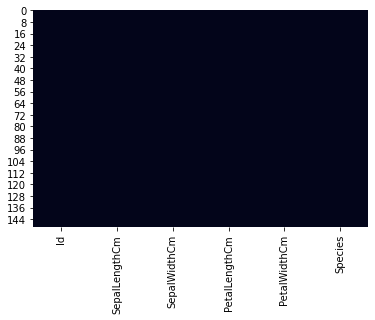

In [140]:
sns.heatmap(df.isnull(),cbar=False)
print(df.isnull().sum())

### Visualizing the pairwise relationships of different iris features in dataset.

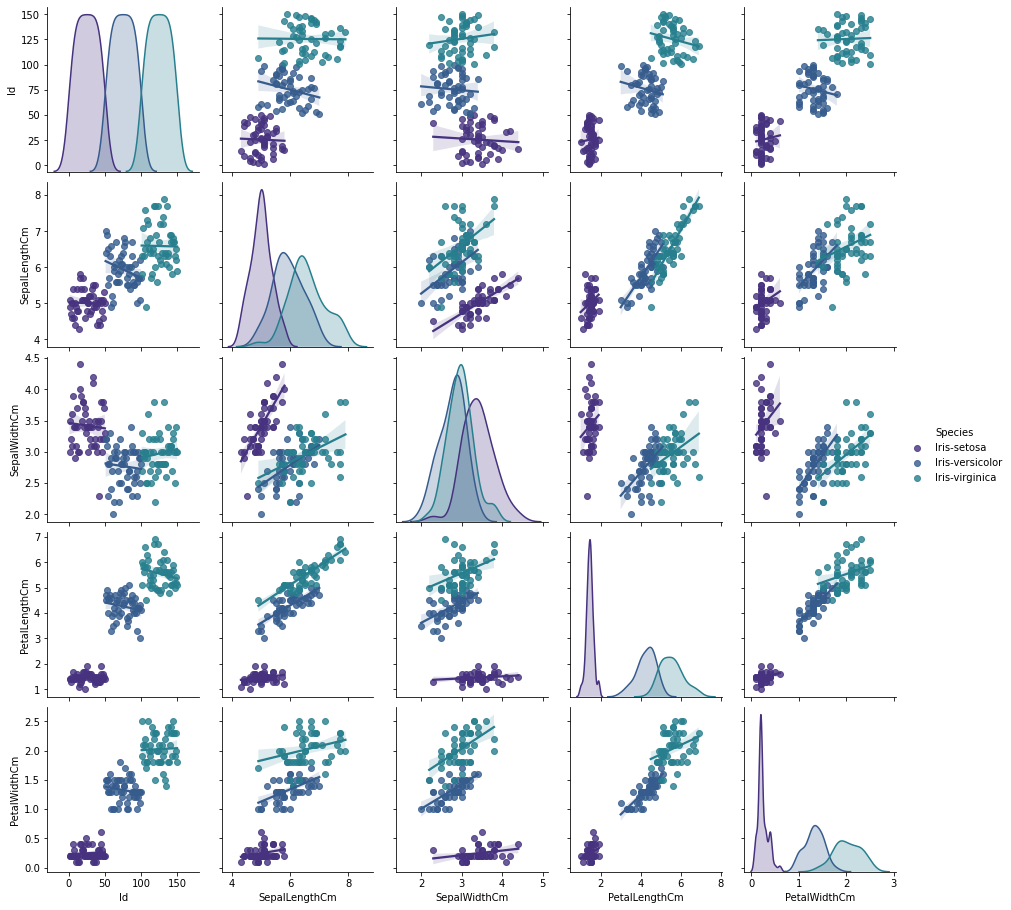

In [141]:
sns.pairplot(df,hue='Species',kind='reg')

In [142]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Scatterplot for showing the relationship between Petal length & Sepal length corresponding to the sepal and petal width (i.e For each species)

In [158]:
fig1=px.scatter(df.query('Species=="Iris-setosa"'),x='SepalLengthCm',y='PetalLengthCm',size='SepalWidthCm',color='PetalWidthCm'
           ,title='Features of Iris-setosa',size_max=40)
fig2=px.scatter(df.query('Species=="Iris-versicolor"'),x='SepalLengthCm',y='PetalLengthCm',size='SepalWidthCm',color='PetalWidthCm'
           ,title='Features of Iris-versicolor',size_max=40)
fig3=px.scatter(df.query('Species=="Iris-virginica"'),x='SepalLengthCm',y='PetalLengthCm',size='SepalWidthCm',color='PetalWidthCm'
           ,title='Features of Iris-virginica',size_max=40)
fig1.show()
fig2.show()
fig3.show()

### Splitting the dataset into inputs and target.

In [144]:
inputs=df.drop(['Id','Species'],axis='columns')
target=df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],axis='columns')

#### Since the model only works on the numeric values but not string values, we will convert the names of scecies into 3 different numeric categories.

In [145]:
le_species=le()
target['species_n']=le_species.fit_transform(target.Species)
target

,Species,species_n
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [146]:
target_n=target.drop('Species',axis='columns')
#target_n

In [147]:
inputs.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Splitting into train & test dataset and fitting in the decision tree classifier model.

In [148]:
x_train,x_test,y_train,y_test=tts(inputs,target_n)

In [149]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [150]:
pred=model.predict(x_test)

In [151]:
#### Lets test the accuracy of the model

In [152]:
model.score(x_test,y_test)

0.8947368421052632

#### Now lets create the dataset containing the features, predicted values and actual values.

In [153]:
x_test.insert(4,'Predicted',pred)
x_test.insert(5,'Actual',y_test)

In [154]:
x_test['predicted']=x_test.Predicted.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
x_test['actual']=x_test.Actual.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})

<ipython-input-154-1a769f04371a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-154-1a769f04371a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
final=x_test.drop(['Predicted','Actual'],axis='columns')
final

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted,actual
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa,Iris-setosa
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


### The Decision Tree of our model

Text(0.5, 1.0, 'Decision Tree')

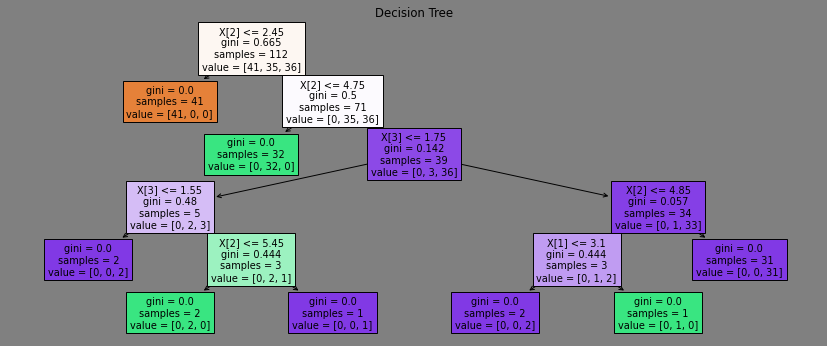

In [156]:
plt.figure(num=None,figsize=(15,6),dpi=70,facecolor='grey',edgecolor='black')
tree.plot_tree(model,filled=True)
plt.title('Decision Tree')